# 👨‍⚕️ Projet Stroke Alert 👩‍⚕️

## Modélisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

On va remplacer les champs "Unknown" de la colonne "smoking_status" par des N/A. 

In [3]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)

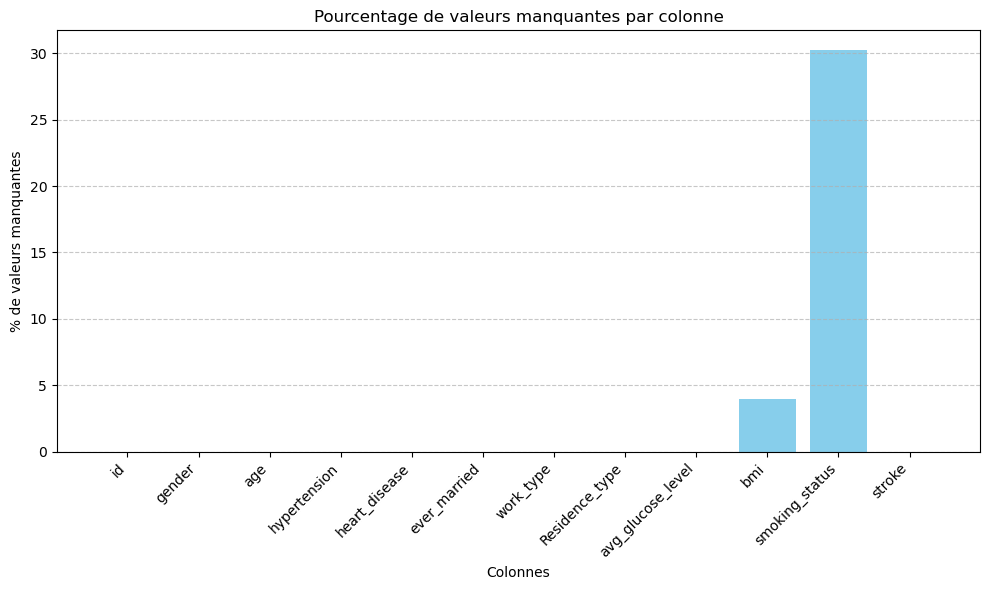

In [4]:
missing_percentages = [(1 - df[column].dropna().shape[0] / df[column].shape[0]) * 100 for column in df.columns]

plt.figure(figsize=(10, 6))
plt.bar(df.columns, missing_percentages, color='skyblue')
plt.xlabel('Colonnes')
plt.ylabel('% de valeurs manquantes')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
df_patient_avc = df.loc[df['stroke'] == 1,:]
df_patient_no_avc = df.loc[df['stroke'] == 0,:]
print(f"Dans notre échantillon, il y a {df_patient_avc.shape[0]} patients ayant contracté un AVC.")

Dans notre échantillon, il y a 249 patients ayant contracté un AVC.


#### ML feature unique

Régression logistique

Ce modèle est adapté pour prédire une variable de type binaire. C'est parfait car on veut prédire la variable 'stroke' qui est binaire. En ce qui concerne les prédicteurs, ils nous faut des variables au format numérique. Pour les autres, soit on ne les considère pas, soit on peut utiliser un encodage pour les transformer au format numérique.
Dans ce contexte médical, on favorisera un rappel à 100% et une forte précision, car on préferera prédire des faux positifs que des faux négatifs

In [6]:
# Sélectionner les features et la cible
X = df[['age']]  # Remarque : Utilisation de double crochets pour sélectionner une colonne et obtenir un DataFrame

y = df['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)


Matrice de confusion :
 [[960   0]
 [ 62   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022


Exactitude du modèle : 0.9393346379647749

Précision du modèle : 0.0

Rappel du modèle : 0.0


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
partie_a_dupli = df.loc[df['stroke'] == 1,:]
df_surechant = df.copy()
for _ in range(19):
    df_surechant = pd.concat([df_surechant,partie_a_dupli], ignore_index=True)

In [8]:
# Sélectionner les features et la cible
X = df_surechant[['age']]  # Remarque : Utilisation de double crochets pour sélectionner une colonne et obtenir un DataFrame
y = df_surechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)

Matrice de confusion :
 [[2137 2257]
 [ 153 4310]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.49      0.64      4394
           1       0.66      0.97      0.78      4463

    accuracy                           0.73      8857
   macro avg       0.79      0.73      0.71      8857
weighted avg       0.79      0.73      0.71      8857


Exactitude du modèle : 0.7278988370780174

Précision du modèle : 0.6563118623420131

Rappel du modèle : 0.9657181268205243


In [9]:
df_sousechant = df.iloc[:((df['stroke'] == 1).sum()*2)]
# Sélectionner les features et la cible
X = df_sousechant[['age']]  # Remarque : Utilisation de double crochets pour sélectionner une colonne et obtenir un DataFrame
y = df_sousechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)

Matrice de confusion :
 [[38 34]
 [ 8 70]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.53      0.64        72
           1       0.67      0.90      0.77        78

    accuracy                           0.72       150
   macro avg       0.75      0.71      0.71       150
weighted avg       0.75      0.72      0.71       150


Exactitude du modèle : 0.72

Précision du modèle : 0.6730769230769231

Rappel du modèle : 0.8974358974358975


[[VN  FP] [FN  VP]] Format matrice de confusion de scikit-learn


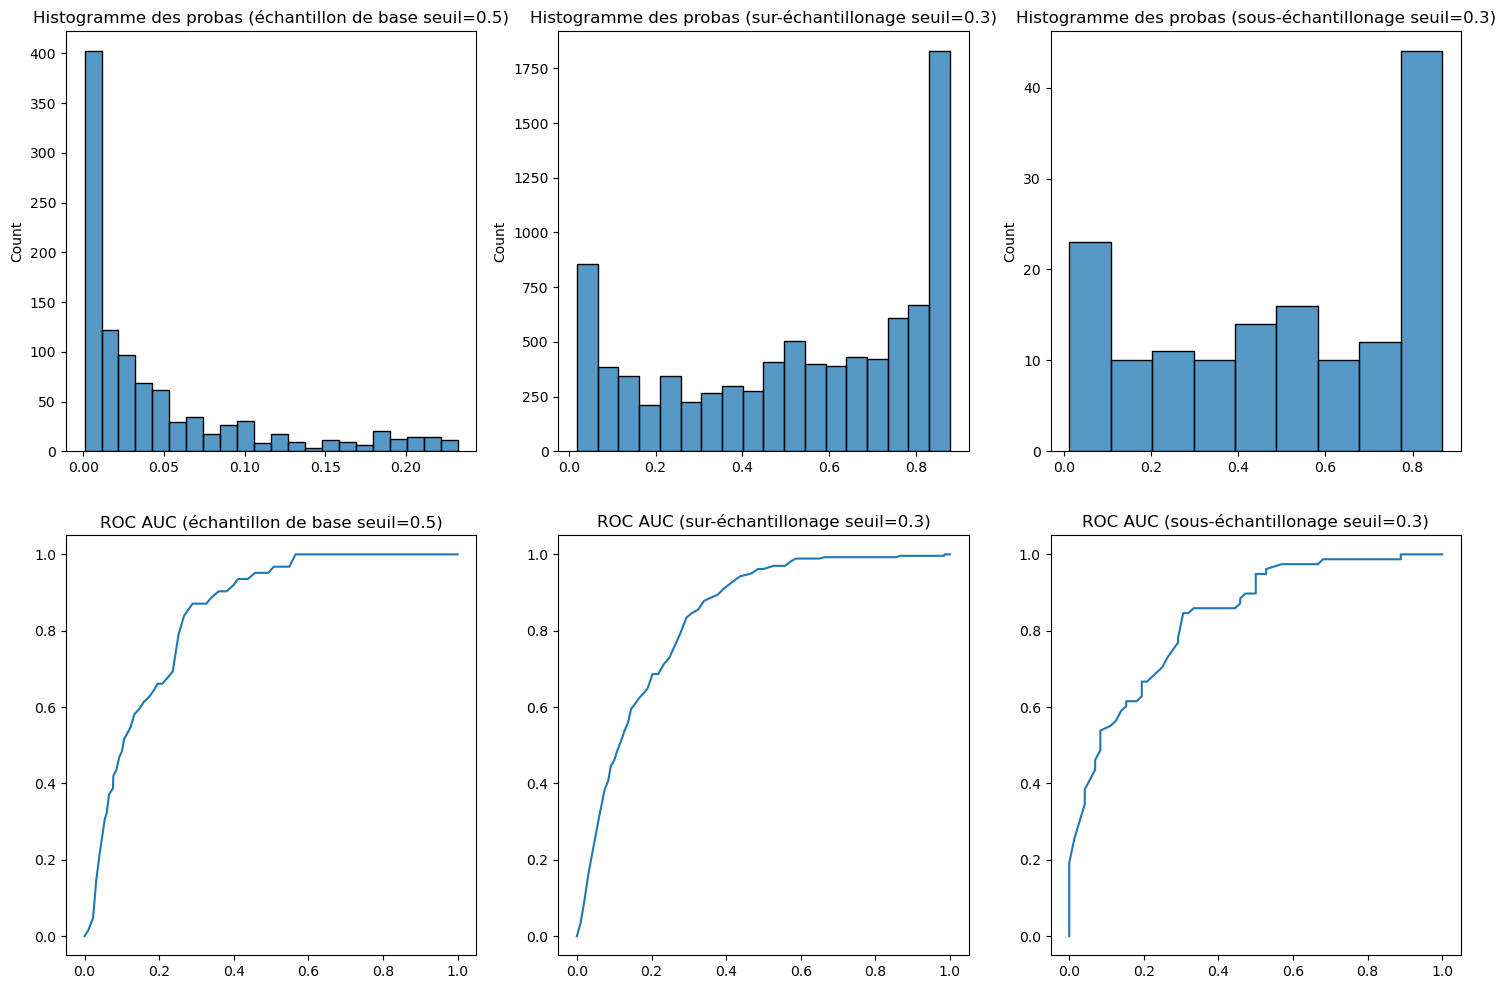

In [10]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.3)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.3)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


La courbe ROC AUC détermine la performance d'un modèle, plus la courbe tend vers le sommet supérieur gauche, plus le modèle est fiable et performant.

Le modèle randomForest est plus flexible que la régression logistique en terme de prédicteurs, il accepte les variables numériques et catégorielles. Ce modèle prédit aussi des variables cibles de type binaire.

Random forest

In [11]:
X = df[['age']]
X = pd.get_dummies(X)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)




Matrice de confusion :
 [[960   0]
 [ 62   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022


Exactitude du modèle : 0.9393346379647749

Précision du modèle : 0.0

Rappel du modèle : 0.0


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On utilise l'encodage one-hot (X = pd.get_dummies(X)) qui consiste à éclater les variables catégorielles en autant de variables qu'il y a de champs dans la variable d'origine. Les variables engendrées seront binaires.

In [12]:
X = df_surechant[['age']]
X = pd.get_dummies(X)
y = df_surechant['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))


fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)




Matrice de confusion :
 [[ 996  474]
 [ 187 1296]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      1470
           1       0.73      0.87      0.80      1483

    accuracy                           0.78      2953
   macro avg       0.79      0.78      0.77      2953
weighted avg       0.79      0.78      0.77      2953


Exactitude du modèle : 0.7761598374534372

Précision du modèle : 0.7322033898305085

Rappel du modèle : 0.8739042481456507


In [13]:
X = df_sousechant[['age']]
X = pd.get_dummies(X)
y = df_sousechant['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)



Matrice de confusion :
 [[39 33]
 [ 9 69]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        72
           1       0.68      0.88      0.77        78

    accuracy                           0.72       150
   macro avg       0.74      0.71      0.71       150
weighted avg       0.74      0.72      0.71       150


Exactitude du modèle : 0.72

Précision du modèle : 0.6764705882352942

Rappel du modèle : 0.8846153846153846


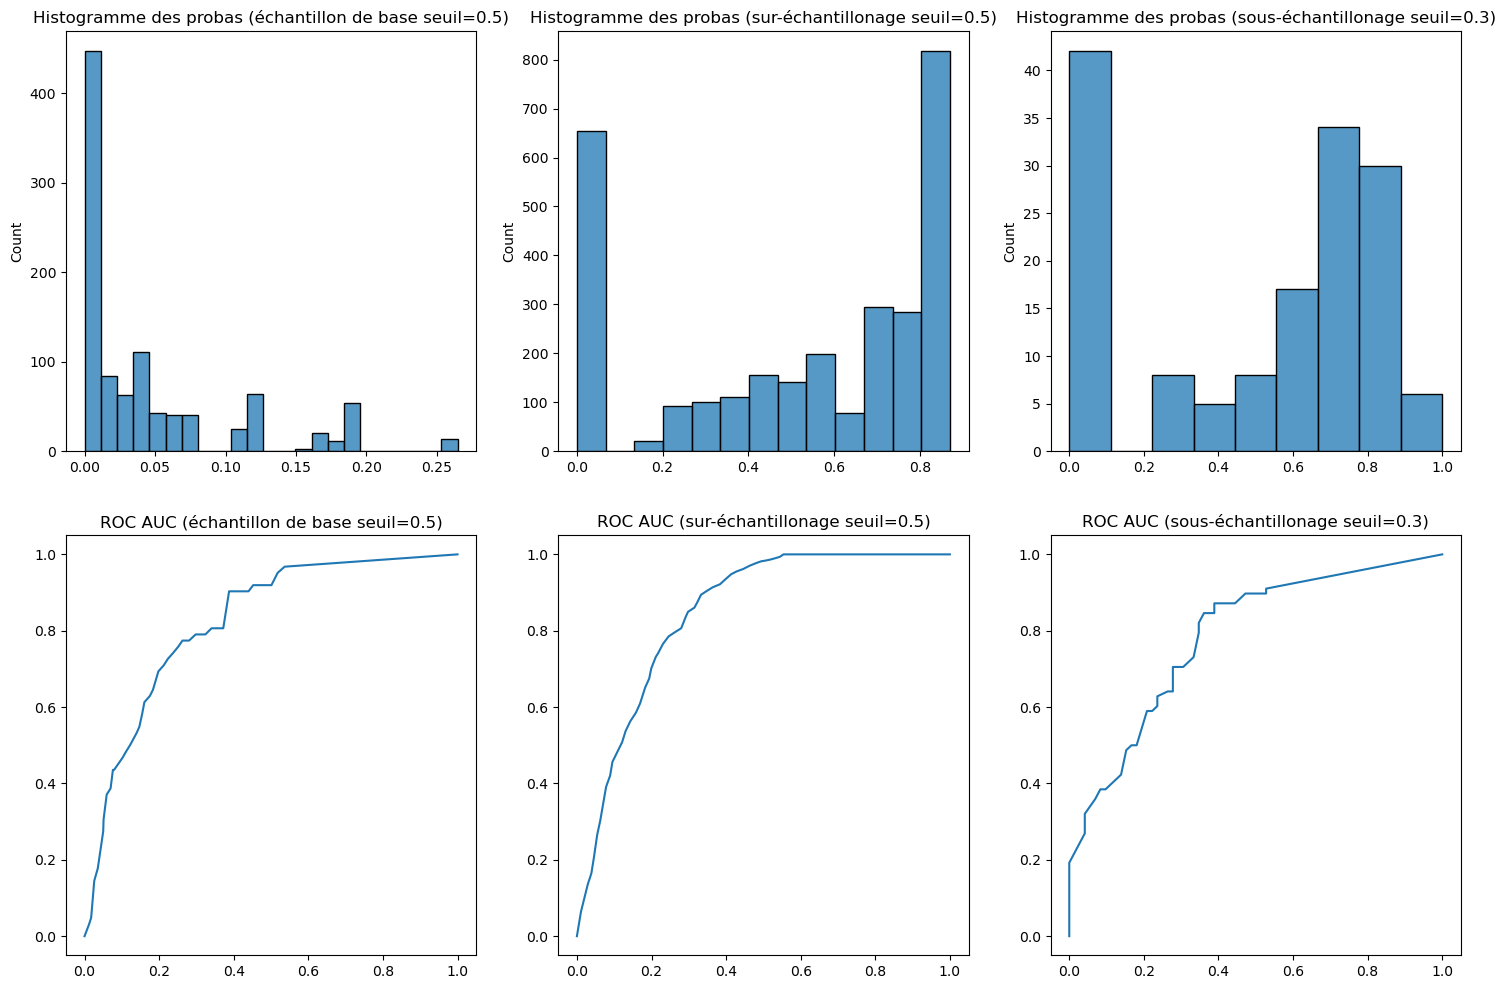

In [14]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.5)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.5)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


Gradient boosting classifier

In [15]:
# Sélectionner les features et la cible
X = df[['age']]

y = df['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)


Matrice de confusion :
 [[960   0]
 [ 62   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022


Exactitude du modèle : 0.9393346379647749

Précision du modèle : 0.0

Rappel du modèle : 0.0


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
X = df_surechant[['age']]

y = df_surechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)

Matrice de confusion :
 [[2152 2242]
 [  75 4388]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.49      0.65      4394
           1       0.66      0.98      0.79      4463

    accuracy                           0.74      8857
   macro avg       0.81      0.74      0.72      8857
weighted avg       0.81      0.74      0.72      8857


Exactitude du modèle : 0.7383990064355876

Précision du modèle : 0.6618401206636501

Rappel du modèle : 0.9831951602061394


In [17]:
df_sousechant = df.iloc[:((df['stroke'] == 1).sum()*2)]
X = df_sousechant[['age']]

y = df_sousechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)

Matrice de confusion :
 [[38 34]
 [ 8 70]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.53      0.64        72
           1       0.67      0.90      0.77        78

    accuracy                           0.72       150
   macro avg       0.75      0.71      0.71       150
weighted avg       0.75      0.72      0.71       150


Exactitude du modèle : 0.72

Précision du modèle : 0.6730769230769231

Rappel du modèle : 0.8974358974358975


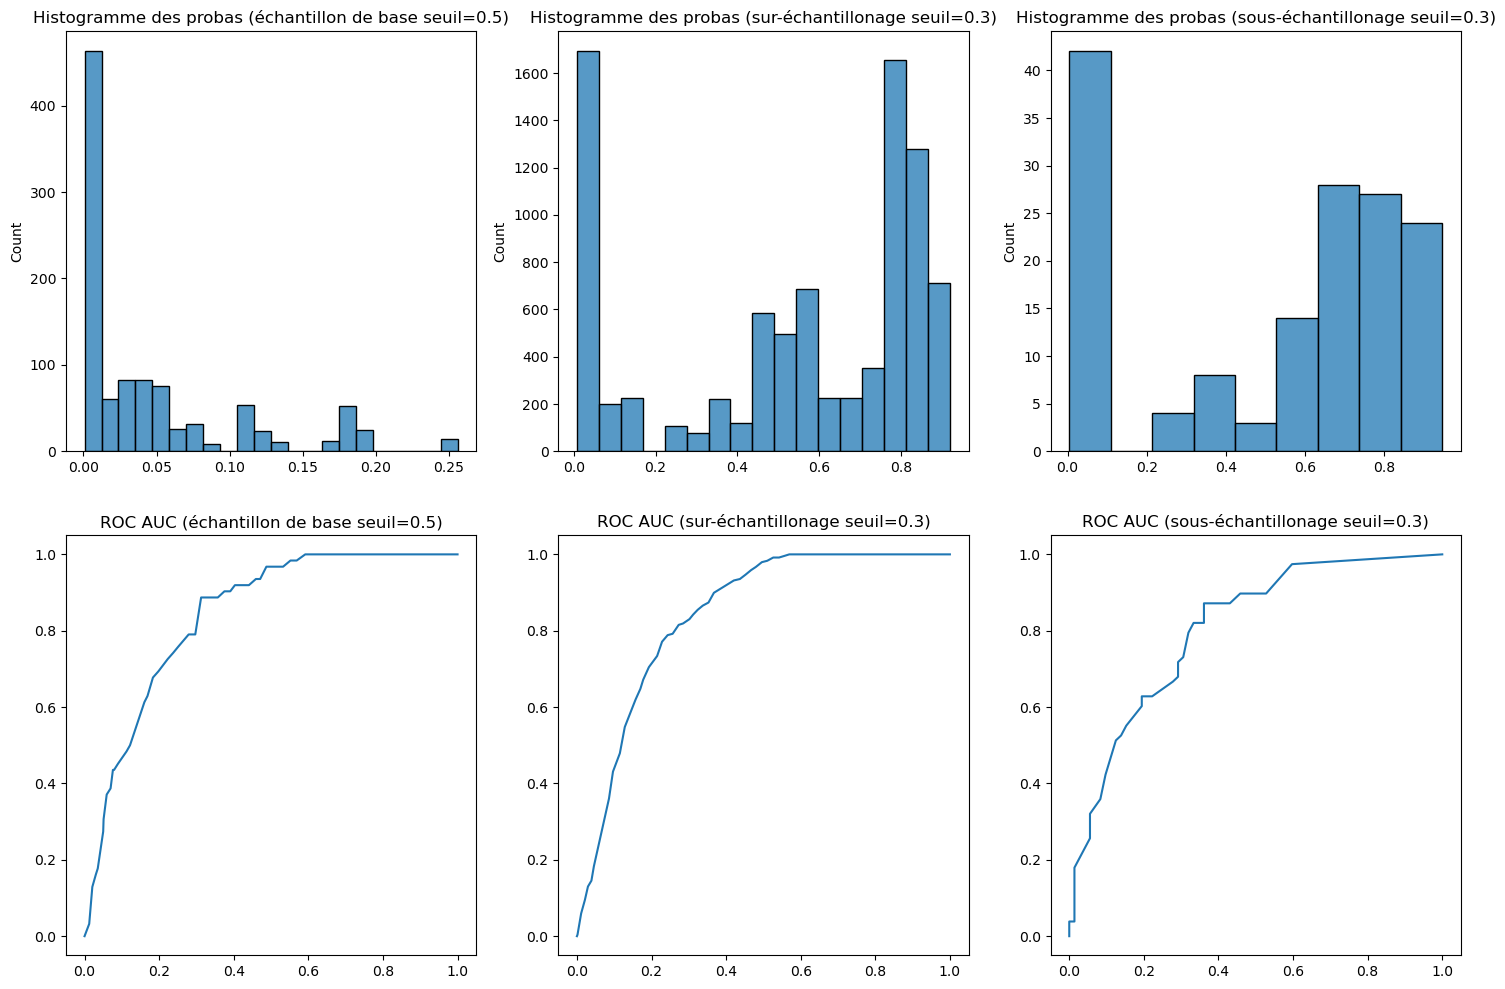

In [18]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.3)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.3)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


#### feature multiple

Random forest

In [19]:
X = df[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)




Matrice de confusion :
 [[939  21]
 [ 58   4]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.16      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.55      0.52      0.53      1022
weighted avg       0.89      0.92      0.91      1022


Exactitude du modèle : 0.9227005870841487

Précision du modèle : 0.16

Rappel du modèle : 0.06451612903225806


In [20]:
X = df_surechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df_surechant['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))


fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)




Matrice de confusion :
 [[1335  135]
 [   0 1483]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      1470
           1       0.92      1.00      0.96      1483

    accuracy                           0.95      2953
   macro avg       0.96      0.95      0.95      2953
weighted avg       0.96      0.95      0.95      2953


Exactitude du modèle : 0.9542837792075856

Précision du modèle : 0.9165636588380717

Rappel du modèle : 1.0


In [21]:
X = df_sousechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df_sousechant['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Nombre d'arbres = 100
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)



Matrice de confusion :
 [[38 34]
 [ 9 69]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.53      0.64        72
           1       0.67      0.88      0.76        78

    accuracy                           0.71       150
   macro avg       0.74      0.71      0.70       150
weighted avg       0.74      0.71      0.70       150


Exactitude du modèle : 0.7133333333333334

Précision du modèle : 0.6699029126213593

Rappel du modèle : 0.8846153846153846


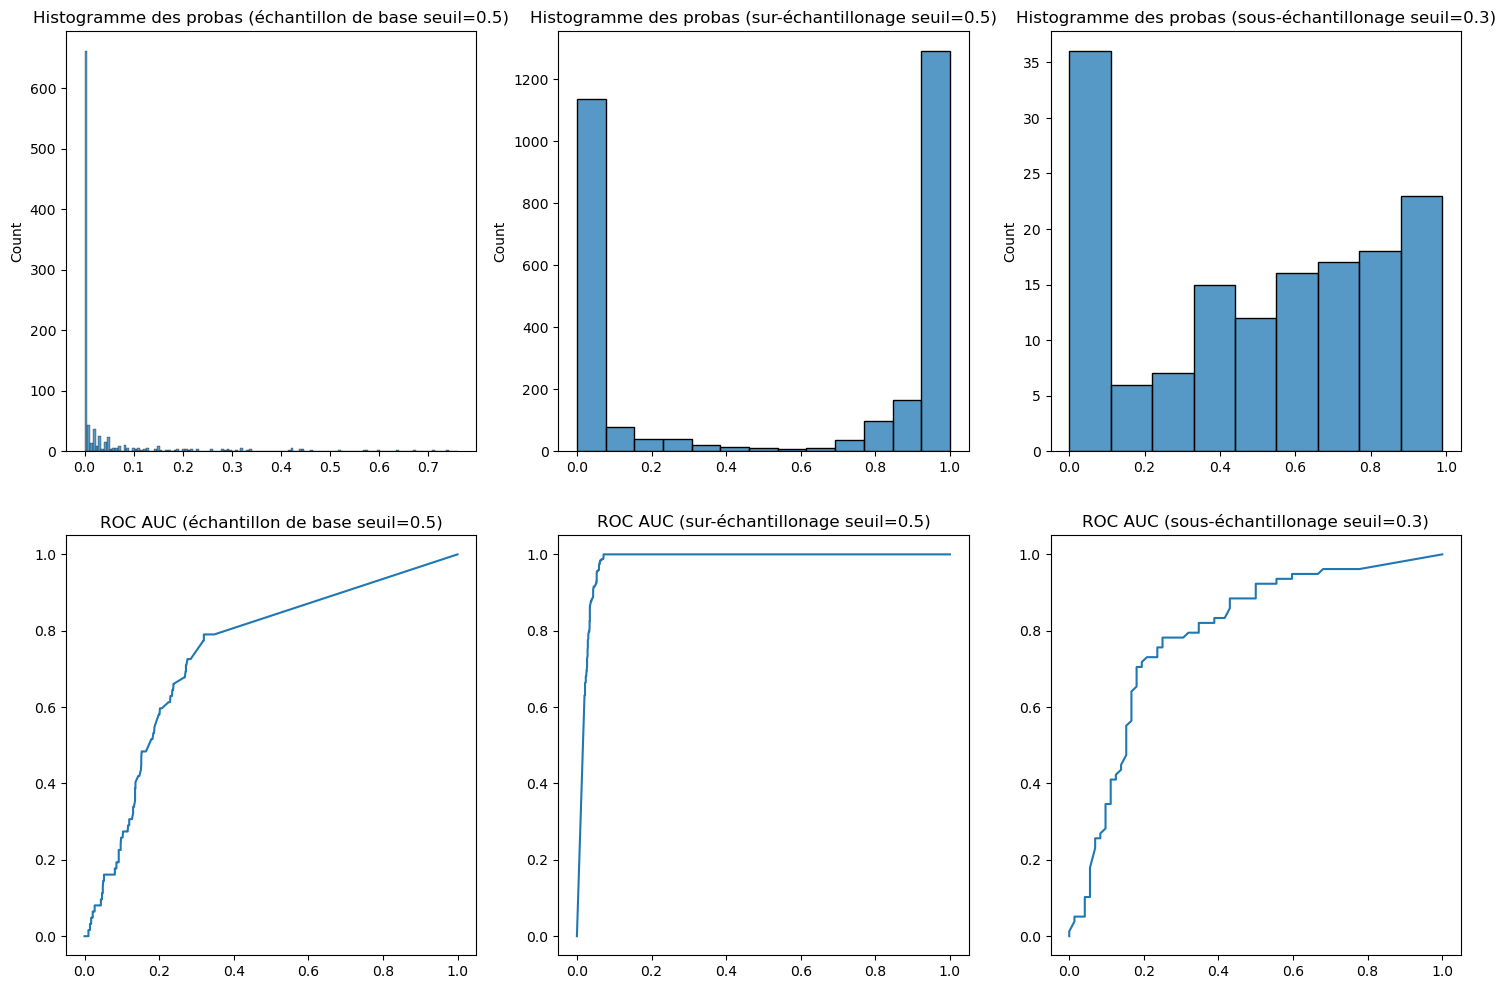

In [22]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.5)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.5)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


Régression logistique

In [23]:
# Sélectionner les features et la cible
X = df[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)


Matrice de confusion :
 [[960   0]
 [ 62   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022


Exactitude du modèle : 0.9393346379647749

Précision du modèle : 0.0

Rappel du modèle : 0.0


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
X = df_surechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df_surechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)

Matrice de confusion :
 [[2297 2097]
 [ 153 4310]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.52      0.67      4394
           1       0.67      0.97      0.79      4463

    accuracy                           0.75      8857
   macro avg       0.81      0.74      0.73      8857
weighted avg       0.80      0.75      0.73      8857


Exactitude du modèle : 0.7459636445749125

Précision du modèle : 0.6727017324800999

Rappel du modèle : 0.9657181268205243


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
df_sousechant = df.iloc[:((df['stroke'] == 1).sum()*2)]
X = df_sousechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)  # Remarque : Utilisation de double crochets pour sélectionner une colonne et obtenir un DataFrame
y = df_sousechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)

Matrice de confusion :
 [[39 33]
 [ 9 69]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        72
           1       0.68      0.88      0.77        78

    accuracy                           0.72       150
   macro avg       0.74      0.71      0.71       150
weighted avg       0.74      0.72      0.71       150


Exactitude du modèle : 0.72

Précision du modèle : 0.6764705882352942

Rappel du modèle : 0.8846153846153846


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


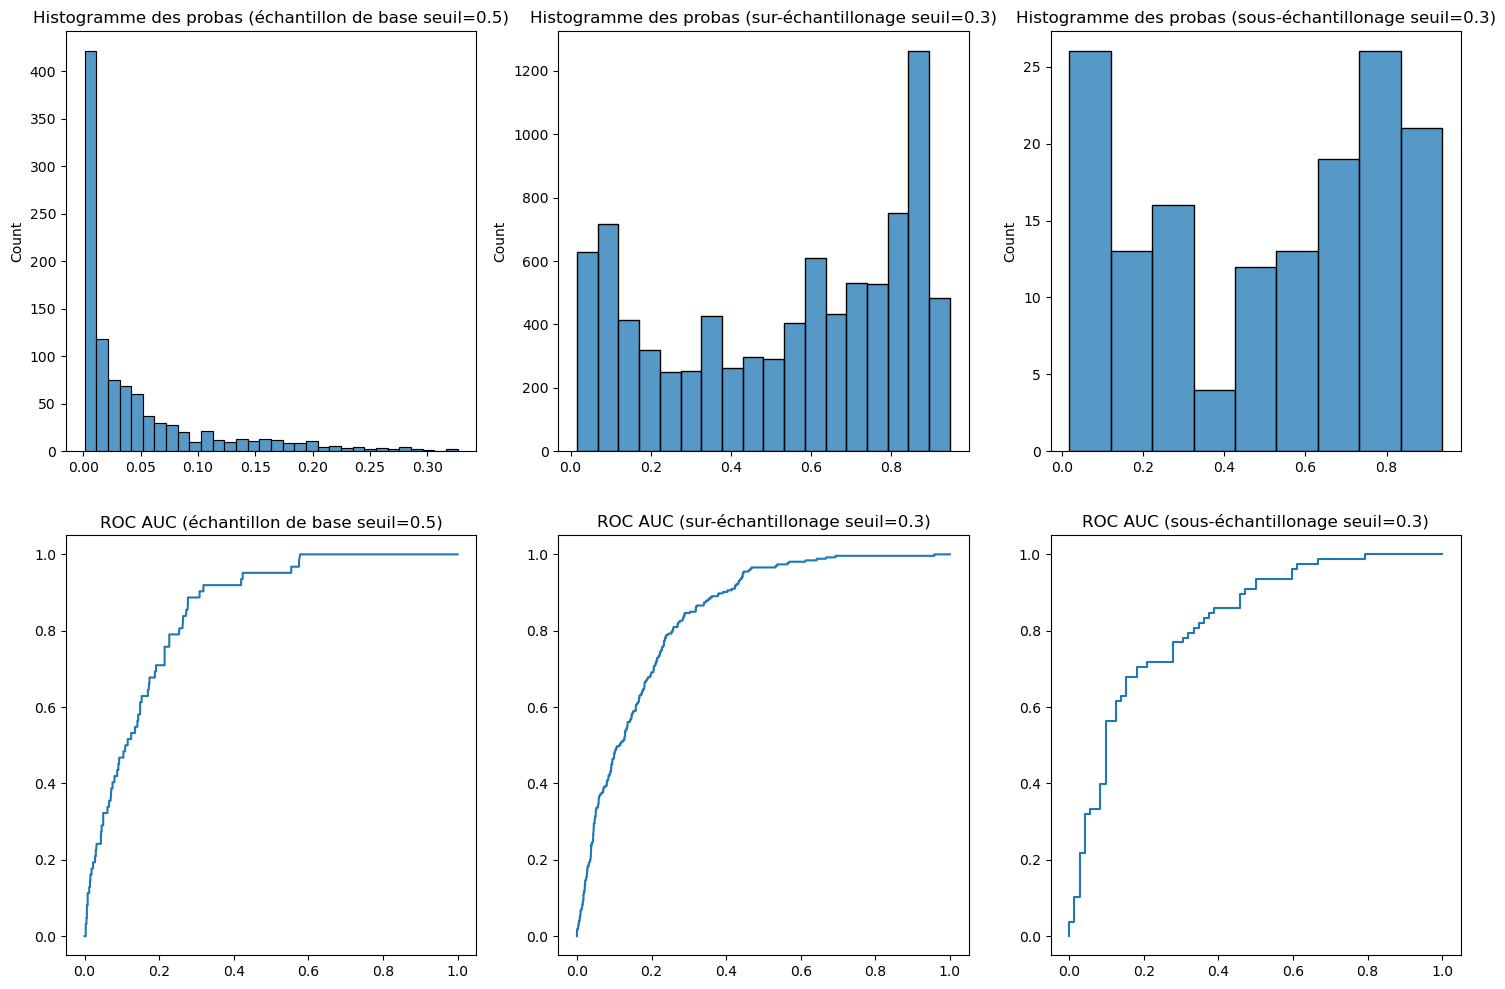

In [26]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.3)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.3)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


Gradient boosting classifier

In [27]:
# Sélectionner les features et la cible
X = df[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_1 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_1 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nPrécision du modèle :", precision_score(y_test, y_pred))
print("\nRappel du modèle :", recall_score(y_test, y_pred))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_hat_proba_1)


Matrice de confusion :
 [[960   0]
 [ 62   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022


Exactitude du modèle : 0.9393346379647749

Précision du modèle : 0.0

Rappel du modèle : 0.0


C:\Users\St-Jean\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
X = df_surechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)
y = df_surechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_2 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_2 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_hat_proba_2)

Matrice de confusion :
 [[2405 1989]
 [  96 4367]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.55      0.70      4394
           1       0.69      0.98      0.81      4463

    accuracy                           0.76      8857
   macro avg       0.82      0.76      0.75      8857
weighted avg       0.82      0.76      0.75      8857


Exactitude du modèle : 0.7645929773060856

Précision du modèle : 0.6870673379483953

Rappel du modèle : 0.9784898050638584


In [29]:
df_sousechant = df.iloc[:((df['stroke'] == 1).sum()*2)]
X = df_sousechant[['ever_married','age','Residence_type','hypertension', 'smoking_status','heart_disease','work_type', 'gender']]
X = pd.get_dummies(X)  # Remarque : Utilisation de double crochets pour sélectionner une colonne et obtenir un DataFrame
y = df_sousechant['stroke']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
model = GradientBoostingClassifier()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_hat_proba_3 = model.predict_proba(X_test)[:,1]

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.3
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba_3 ] # seuil de classification à 0.7

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_03))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_03, zero_division=1))


# Afficher la précision
print("\nExactitude du modèle :", accuracy_score(y_test, y_pred_03))
print("\nPrécision du modèle :", precision_score(y_test, y_pred_03))
print("\nRappel du modèle :", recall_score(y_test, y_pred_03))

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_hat_proba_3)

Matrice de confusion :
 [[38 34]
 [ 9 69]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.53      0.64        72
           1       0.67      0.88      0.76        78

    accuracy                           0.71       150
   macro avg       0.74      0.71      0.70       150
weighted avg       0.74      0.71      0.70       150


Exactitude du modèle : 0.7133333333333334

Précision du modèle : 0.6699029126213593

Rappel du modèle : 0.8846153846153846


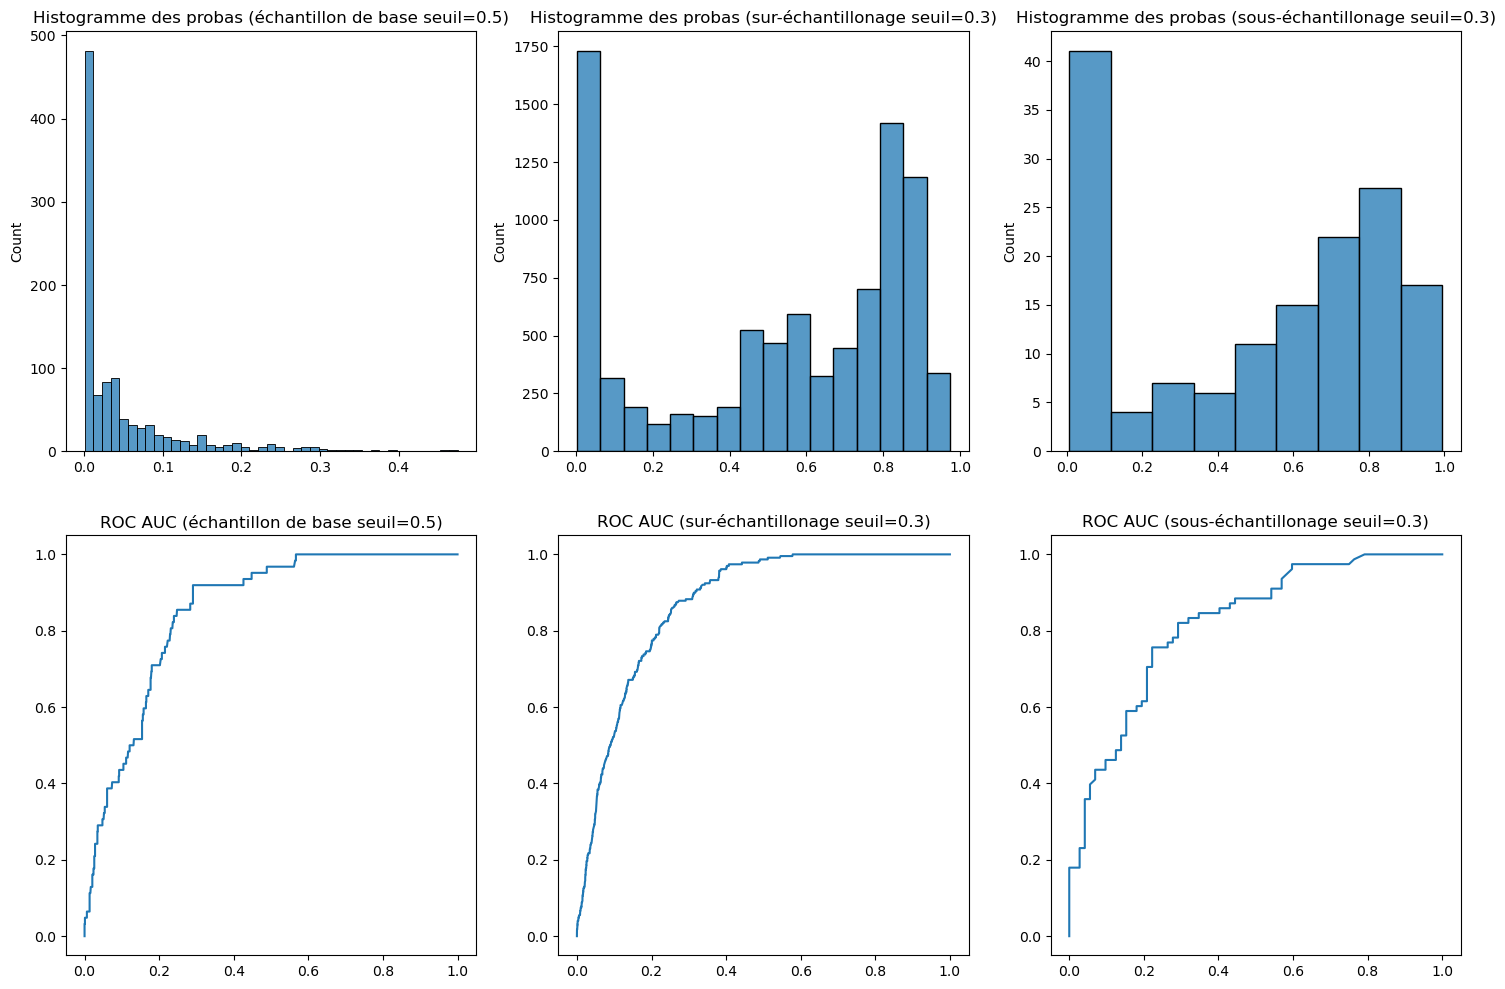

In [31]:
fig, axs = plt.subplots(2,3,figsize=(18,12))

sns.histplot (y_hat_proba_1, ax=axs [0, 0])
axs[0, 0].set_title('Histogramme des probas (échantillon de base seuil=0.5)')

sns.histplot(y_hat_proba_2, ax=axs[0, 1])
axs[0, 1].set_title('Histogramme des probas (sur-échantillonage seuil=0.3)')

sns.histplot(y_hat_proba_3, ax=axs [0, 2])
axs [0, 2].set_title('Histogramme des probas (sous-échantillonage seuil=0.3)')

axs [1, 0].plot(fpr_1, tpr_1)
axs [1, 0]. set_title('ROC AUC (échantillon de base seuil=0.5)')

axs [1, 1].plot(fpr_2, tpr_2)
axs[1, 1].set_title('ROC AUC (sur-échantillonage seuil=0.3)')

axs[1, 2].plot(fpr_3, tpr_3)
axs[1, 2].set_title('ROC AUC (sous-échantillonage seuil=0.3)')

plt.show()


Dans le domaine médical, notre priorité est de minimiser les erreurs de diagnostic. Nous visons donc à détecter tous les patients réellement malades tout en évitant de classer à tort des patients sains comme étant malades. Le rappel, qui mesure la proportion de vrais positifs parmi tous les cas détecté positifs, doit être de 100% pour garantir que aucun cas de maladie ne passe inaperçu. Parallèlement, nous devons également veiller à ne pas surcharger les services médicaux en classant à tort des patients sains comme étant malades. Une précision tendant vers 100% est donc souhaitable. Après avoir examiné différentes méthodes algorithmiques, nous avons constaté que la random forest offre les meilleurs résultats pour notre problème. Elle présente un rappel de 100%, ce qui garantit la détection de tous les cas de vrai malade, et une précision d'environ 92%, assurant que la plupart des patients identifiés comme malades le sont effectivement.
Ce modèle a été entraîné avec un seuil de classification à 0.5 et 30% de données de test.

De plus, on a rapidement remarquer que l'âge est le facteur le plus impactant dans le developpement d'un AVC.